DATASET: https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification

# BUSSINES UNDERSTANDING

Di berbagai negara, terlebih di negara yang memiliki musim dingin, wine sangat sering dan lumrah di konsumsi dikarenakan dapat menghangatkan badan di kala musim dingin/musim salju datang.

Red wine, yang notabenya termasuk dalam kelompok minuman yang dikonsumsi oleh manusia, maka rasa menjadi hal penting dan menjadi sebuat pertimbangan apakah red wine tersebut akan diminum atau tidaknya.

Kualitas dari red wine pun dapat mempengaruhi rasa dari red wine itu sendiri.

Maka dari itu, perlu dibuatkannya model yang dapat membantu dalam melakukan klasifikasi mana red wine yang memiliki kualitas yang bagus dan mana yang tidak. Model ini dibuat menggunakan metode klasifikasi dengan algoritma SVM.

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

2. Load Dataset

In [2]:
df = pd.read_csv('wine.csv')

# DATA UNDERSTANDING

deskripsi dataset:

fixed_acidity = keasaman tetap

volatile_acidity = keasaman mudah menguap

citric_acid = asam sitrat

residual_sugar = sisa gula

chlorides = klorida

free_sulfur_dioxide = sulfur dioksida bebas

total_sulfur_dioxide = total sulfur dioksida

density = densitas

pH = pH

sulphates = sulfat

alcohol = alkohol

In [3]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [4]:
df.shape

(1599, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [6]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# DATA PREPARATION

<Axes: xlabel='quality', ylabel='Count'>

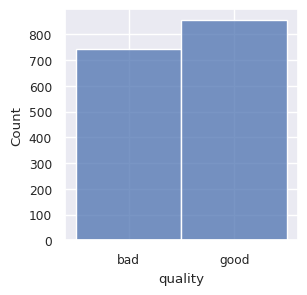

In [8]:
# histplot (categorical)
plt.figure(figsize=(3,3))
sns.set(font_scale=0.8)
sns.histplot(data=df, x='quality')

In [9]:
df['quality'].unique()

array(['bad', 'good'], dtype=object)

In [10]:
df.replace(('bad','good'), (0,1), inplace=True)

In [11]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


# MODELLING

In [12]:
# memisahkan data dan label
X = df.drop (columns='quality', axis=1)
Y = df['quality']

In [13]:
print(X)

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free_sulfur_dioxide  

In [14]:
print(Y)

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64


3. Standarisasi Data

In [15]:
scaler = StandardScaler()

In [16]:
scaler.fit(X)

StandardScaler()

In [17]:
standarized_data = scaler.transform(X)

In [18]:
print(standarized_data)

[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]


In [19]:
X = standarized_data
Y = df['quality']

In [20]:
print(X)
print(Y)

[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]
0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64


4. Memisahkan Data Training dan Data Testing

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, stratify=Y, random_state=2)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(1599, 11) (1279, 11) (320, 11)


5. Membuat data latih menggunakan algoritma SVM

In [23]:
classifier = svm.SVC(kernel='linear')

In [24]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

6. membuat model evaluasi untuk mengukur tingkat akurasi

In [25]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [26]:
print('Akurasi data training adalah = ', training_data_accuracy)

Akurasi data training adalah =  0.7443315089913995


In [27]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [28]:
print('Akurasi data testing adalah = ', test_data_accuracy)

Akurasi data testing adalah =  0.74375


In [29]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


7. Membuat Model Prediksi

In [30]:
input_data = (7.4,0.70,0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshape)

prediction = classifier.predict(std_data)

print(prediction)
print()
if (prediction[0] == 0):
    print('Kualitas Red Wine Buruk')
else :
    print('Kualitas Red Wine Bagus')

[0]

Kualitas Red Wine Buruk


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


8. simpan model

In [31]:
import pickle

In [32]:
filename = 'wine.sav'
pickle.dump(classifier, open(filename,'wb'))
pickle.dump(scaler, open('scaler_wine.sav','wb'))